In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'1.4.0'

In [6]:
import keras

Using TensorFlow backend.


In [7]:
keras.__version__

'2.1.2'

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [9]:
# 載入 MNIST 資料
nb_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

11493376/11490434 [==============================] - 15s 1us/step
x_train original shape (60000, 28, 28)
y_train original shape (60000,)


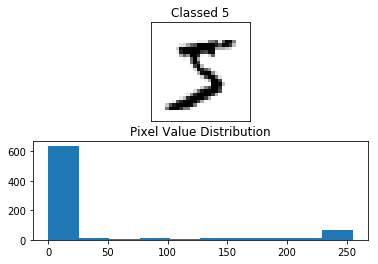

In [11]:
# 繪製圖形使用 imshow 函數
# matplotlib.pyplot.gc() 是得到目前的圖形
# matplotlib.pyplot.inshow 是顯示圖片

fig = plt.figure()
plt.subplot(2, 1, 1)
# 顯示出第一張圖, cmap是顏色, binary 是灰階(黑轉白, 白轉黑)方式呈現圖片
plt.imshow(x_train[0], cmap="binary", interpolation='none')

plt.title("Classed {}".format(y_train[0]))    # 標籤是幾號
plt.xticks([])   # 座標設定無尺度
plt.yticks([])
plt.subplot(2, 1, 2)
plt.hist(x_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [12]:
#顯示維度
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [13]:
# 從 28x28 pixels建立輸入向量
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 正規化資料 0到 1之間
x_train /= 255
x_test /= 255

# 訓練用最後輸入的維度
print("Train matrix shape", x_train.shape)
print("Test matrix shape", x_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [14]:
'''
建立10, nb_classes個元素的向量, 
在第 y_train[0]元素值為1, 
其他向量元素為0.y_train[0] 為 0 到 9的數字
'''
# utils.to_categorical 將標籤轉換成 0 到 9 的陣列

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [15]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [16]:
'''
keras的核心為模型
    最常使用 Sequential 模型
'''
# 深度學習隱藏層有兩層或兩層以上
# 用 add() 將每層的神經網路疊起
# 只須設定每層的大小(units)與啟動函數(activation function)
# 最後一層的啟動函數為 softmax() 為歸一化指數函數
# 將向量的值歸一化為 0 到 1 之間

model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(10))
model.add(Activation('softmax'))

In [18]:
# keras編譯模型 model.compile()
# 使用 Adam 作為優化器，成本函數使用 categorical_crossentropy

model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [19]:
# 訓練和建立模型 model.fit()
# 訓練為 80%，用來驗證的設為 20%，反覆 8次執行，每次 128筆
history = model.fit(x_train, y_train,
                   batch_size=128, epochs=8,
                   verbose=2,
                   validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
 - 5s - loss: 0.3496 - acc: 0.8938 - val_loss: 0.1281 - val_acc: 0.9609
Epoch 2/8
 - 5s - loss: 0.1503 - acc: 0.9547 - val_loss: 0.0936 - val_acc: 0.9689
Epoch 3/8
 - 5s - loss: 0.1104 - acc: 0.9661 - val_loss: 0.0819 - val_acc: 0.9746
Epoch 4/8
 - 5s - loss: 0.0905 - acc: 0.9722 - val_loss: 0.0675 - val_acc: 0.9792
Epoch 5/8
 - 5s - loss: 0.0774 - acc: 0.9759 - val_loss: 0.0719 - val_acc: 0.9774
Epoch 6/8
 - 5s - loss: 0.0698 - acc: 0.9781 - val_loss: 0.0677 - val_acc: 0.9796
Epoch 7/8
 - 5s - loss: 0.0598 - acc: 0.9807 - val_loss: 0.0649 - val_acc: 0.9801
Epoch 8/8
 - 5s - loss: 0.0553 - acc: 0.9819 - val_loss: 0.0640 - val_acc: 0.9814


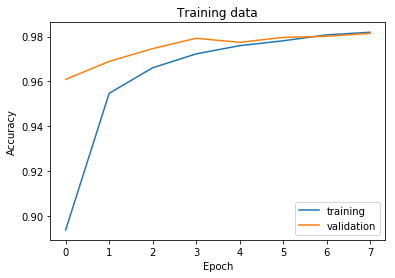

In [23]:
'''
history.history.keys()傳回 History物件的字典
    loss是成本，acc是準確度
    history.history.keys()
'''

# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

# 顯示模型資料準確性
# 訓練和驗證的準確性
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training data')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

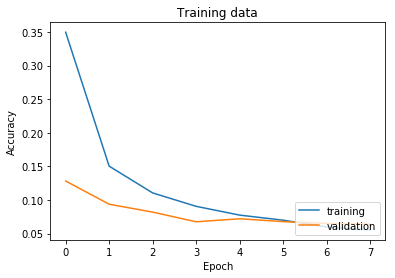

In [24]:
# 成本函數 loss
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training data')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

In [26]:
# 驗證模型準確性使用 evaluate()

loss_and_metrics = model.evaluate(x_test, y_test, verbose=2)

print("Test Loss: ", loss_and_metrics[0])
print("Test Accuracy: ", loss_and_metrics[1])

Test Loss:  0.0639810940109
Test Accuracy:  0.9814


In [27]:
# model.predict_classes 得到驗證的結果
# correct_indices 為預測正確的索引，incorrect_indices為預測錯誤的索引

predicted_classes = model.predict_classes(x_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

C:\Users\Zhong-Xun Yu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """
C:\Users\Zhong-Xun Yu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  


In [28]:
predicted_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [29]:
# matplotlib.pyplot.figure 將回傳圖形實體
# rcParams 定義預設數值

# 設定圖形長 12 寬 7
plt.rcParams['figure.figsize'] = (7, 12)

figure_evaluation = plt.figure()

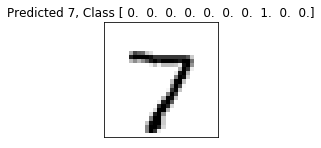

In [52]:
# 繪製實際和預測結果的手寫辨識
# 放置 9 個正確的預測圖形
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='binary')
    plt.title("Predicted {}, Class {}".format(
        predicted_classes[correct], y_test[correct]))
    plt.xticks([])
    plt.yticks([])
    
    
figure_evaluation

In [54]:
# 28x28的圖形，正規化成 0 到 1 的數值
x_test[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [55]:
# y_test 為 0 到 9 的數值
x_test, y_test

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))

In [56]:
incorrect_indices

array([0], dtype=int64)

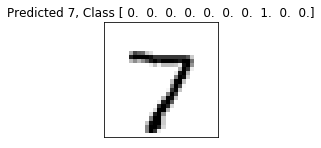

In [60]:
# 顯示預測圖形
figure_evaluation = plt.figure()

# 放置 9 個錯誤的預測圖形
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='binary')
    plt.title("Predicted {}, Class {}".format(
        predicted_classes[incorrect], y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])
    
    
figure_evaluation